In [1]:
import azure.core
from azureml.core import Workspace,Environment,Experiment,ScriptRunConfig
from azureml.core.compute import AmlCompute, ComputeTarget
from azureml.core.compute_target import ComputeTargetException

In [2]:
resource_name = "FutureReadtTalent"
workspace_name = "NPTELProject"
subscriptionID = "c9c4ba8f-4fd1-4939-ada7-da53564b2988" 
aml_compute_target = "akritiupadhyay1" 
experiment_name= 'gold_price'

In [3]:
# Now create Workspace
try:
    ws=Workspace.from_config()
    print('Workspace is already exist')
except:
    ws=Workspace.create(workspace_name, 
                    resource_group=resource_name,
                    create_resource_group=True,
                    subscription_id=subscriptionID,
                    location="West US")
    ws.write_config('.azureml')

Workspace is already exist


In [4]:
Workspace.from_config()

Workspace.create(name='nptelproject', subscription_id='c9c4ba8f-4fd1-4939-ada7-da53564b2988', resource_group='futurereadttalent')

In [5]:
# Create Compute Target
try:
    aml_compute = AmlCompute(ws, aml_compute_target)
    print("This Compute Target already exist.")
except ComputeTargetException:
    print("creating new compute target :",aml_compute_target)
    
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = "STANDARD_D2_V2",
                                                                min_nodes = 1, 
                                                                max_nodes = 4,
                                               idle_seconds_before_scaledown=3000)    
    aml_compute = ComputeTarget.create(ws, aml_compute_target, provisioning_config)
    aml_compute.wait_for_completion(show_output=True, min_node_count=None, timeout_in_minutes=20)
    
print("Azure Machine Learning Compute attached now")

This Compute Target already exist.
Azure Machine Learning Compute attached now


In [6]:
# Create Experiment
exp = Experiment(ws,experiment_name)

## Importing Libraries

In [7]:
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [9]:
data = pd.read_csv("Gold Price.csv")
data.head()

,Name,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar
0,12/29/1978,226.00,137.10,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.00,137.10,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/1979,226.80,137.30,"43,164.90",111.50,263.70,359.60,"1,792.90",NaN,NaN,735.60,"138,160.50",851.30,"4,454.60",NaN,NaN,"107,470.00",NaN,194.60,193.60
3,3/1/1979,218.60,134.00,"43,717.90",108.00,264.40,365.90,"1,802.20",NaN,NaN,739.40,"138,877.00",855.70,"4,477.70",NaN,NaN,"108,027.40",NaN,192.20,193.00
4,4/1/1979,223.20,136.80,"43,674.90",110.70,264.10,366.40,"1,811.70",NaN,NaN,743.40,"139,616.30",860.30,"4,501.50",NaN,NaN,"108,602.50",NaN,193.00,194.60


In [10]:
data.shape

(11677, 20)

## Null Data

In [11]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Japanese yen             2
Canadian dollar          2
Swiss franc              2
Indian rupee             2
Chinese renmimbi      1571
Turkish lira          1045
Saudi riyal              2
Indonesian rupiah        2
UAE dirham               2
Thai baht                2
Vietnamese dong       2851
Egyptian pound        2591
Korean won               2
Russian ruble         3661
South African rand       2
Australian dollar        2
dtype: int64

In [12]:
data = data.rename(columns = {"Name":"Date"})
data = data.dropna()
data.head()

,Date,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar
3661,11/1/1993,328.40,264.60,"41,063.30",211.40,419.30,489.40,"9,447.20","1,864.20",2.90,"1,232.90","678,984.20","1,207.40","8,322.60","3,501,319.60","1,072.20","258,497.60",132.70,"1,012.60",488.90
3662,12/1/1993,329.20,266.10,"41,256.90",213.80,420.20,493.30,"9,526.50","1,885.10",2.90,"1,238.90","686,604.20","1,214.10","8,413.80","3,540,613.90","1,099.50","262,333.90",134.20,"1,011.70",488.40
3663,1/13/1993,327.60,265.20,"41,276.20",212.80,420.40,488.80,"9,478.60","1,876.30",2.90,"1,233.30","679,859.60","1,207.90","8,378.60","3,524,014.10","1,093.50","259,550.80",133.60,"1,011.30",487.70
3664,1/14/1993,327.70,263.40,"41,182.70",213.10,418.70,485.40,"9,477.90","1,879.30",2.90,"1,232.10","683,512.40","1,206.60","8,417.70","3,529,676.20","1,093.00","261,507.50",133.80,"1,009.20",490.50
3665,1/15/1993,327.70,265.10,"41,337.30",214.20,419.80,490.50,"9,507.60","1,888.80",2.90,"1,233.30","682,063.70","1,207.80","8,383.10","3,547,517.40","1,093.40","260,896.30",134.50,"1,010.70",488.00


## Datetime Extraction

In [13]:
data['Date'] = pd.to_datetime(data['Date'],format = "%m/%d/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
#data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day
data.tail()

,Date,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,...,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar,Year,Month,Day
11672,2023-09-26,"1,907.10","1,804.40","284,017.00","1,566.90","2,576.60","1,744.20","158,862.00","13,942.80","51,982.20",...,"69,510.10","46,499,600.20","58,977.40","2,579,914.50","185,121.50","36,346.70","2,977.00",2023,9,26
11673,2023-09-27,"1,887.30","1,796.90","282,377.80","1,556.50","2,551.10","1,737.30","157,100.00","13,793.00","51,542.00",...,"69,262.00","46,040,683.50","58,307.00","2,562,934.50","182,828.00","36,254.50","2,969.80",2023,9,27
11674,2023-09-28,"1,873.60","1,774.50","279,702.30","1,535.70","2,526.50","1,716.90","155,765.10","13,673.20","51,373.50",...,"68,527.00","45,714,620.00","57,886.70","2,530,660.20","181,380.10","35,614.90","2,916.90",2023,9,28
11675,2023-09-29,"1,870.50","1,768.30","279,471.40","1,532.40","2,533.60","1,710.60","155,445.80","13,650.90","51,294.90",...,"68,407.90","45,518,617.50","57,796.00","2,523,098.80","180,724.30","35,342.20","2,904.10",2023,9,29
11676,2023-02-10,"1,870.50","1,768.30","279,471.40","1,532.40","2,533.60","1,710.60","155,445.80","13,650.90","51,294.90",...,"68,407.90","45,518,617.50","57,796.00","2,523,098.80","180,724.30","35,342.20","2,904.10",2023,2,10


## Separating the data of 10 years from now 

In [14]:
data10 = data[(data['Year']>2013)]
data10.shape

(2544, 23)

In [15]:
columns_to_convert = data10.columns[1:20]
data10[columns_to_convert] = data10[columns_to_convert].apply(lambda series: series.str.replace(',', '').astype(float))
data10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 9133 to 11676
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2544 non-null   datetime64[ns]
 1   US dollar           2544 non-null   float64       
 2   Euro                2544 non-null   float64       
 3   Japanese yen        2544 non-null   float64       
 4   Pound Sterling      2544 non-null   float64       
 5   Canadian dollar     2544 non-null   float64       
 6   Swiss franc         2544 non-null   float64       
 7   Indian rupee        2544 non-null   float64       
 8   Chinese renmimbi    2544 non-null   float64       
 9   Turkish lira        2544 non-null   float64       
 10  Saudi riyal         2544 non-null   float64       
 11  Indonesian rupiah   2544 non-null   float64       
 12  UAE dirham          2544 non-null   float64       
 13  Thai baht           2544 non-null   float64      

In [16]:
file_path = "gold_price.csv"
data10.to_csv(file_path, index = False)

In [17]:
dataIndia = data10[['Date','Year','Month','Day','Indian rupee']]
dataIndia.shape

(2544, 5)

In [18]:
dataIndia.head()

,Date,Year,Month,Day,Indian rupee
9133,2014-01-01,2014,1,1,74461.6
9134,2014-02-01,2014,2,1,76335.9
9135,2014-03-01,2014,3,1,76810.6
9136,2014-06-01,2014,6,1,77697.5
9137,2014-07-01,2014,7,1,76305.1


In [19]:
dataIndia.isnull().sum()

Date            0
Year            0
Month           0
Day             0
Indian rupee    0
dtype: int64

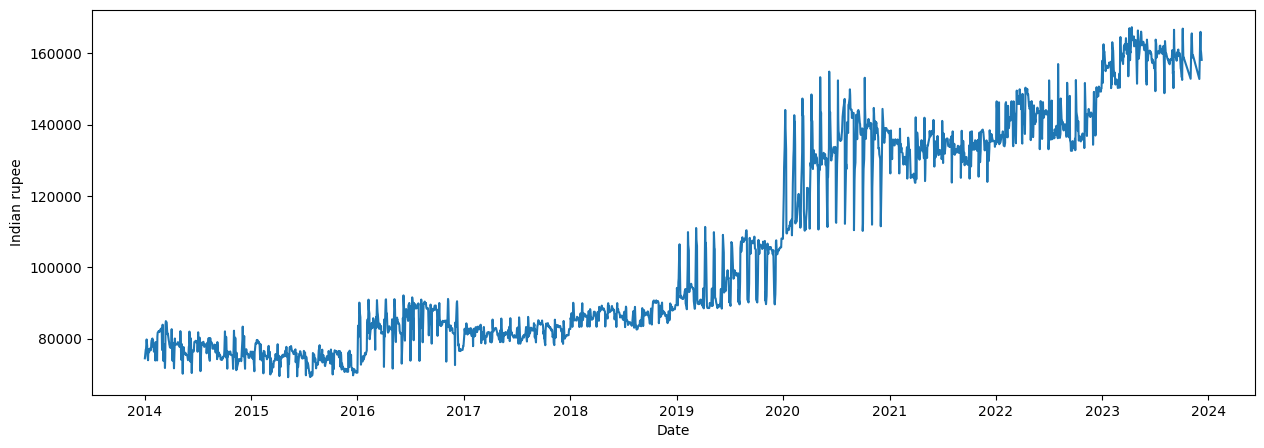

In [20]:
plt.subplots(figsize = (15,5))
sns.lineplot(dataIndia,x = dataIndia['Date'], y = dataIndia['Indian rupee'])
plt.show()

In [21]:
years = list(dataIndia['Year'].value_counts().index.sort_values())
years

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

## Helper function for collecting and plotting data of each year after separation

In [22]:
def Yearly_data(year):
    grp = dataIndia[(dataIndia.Year == year)]
    plt.subplots(figsize = (20,5))
    sns.lineplot(grp,x = grp.Month, y = grp['Indian rupee'])
    plt.title(f'Year {year}')
    plt.show()
    

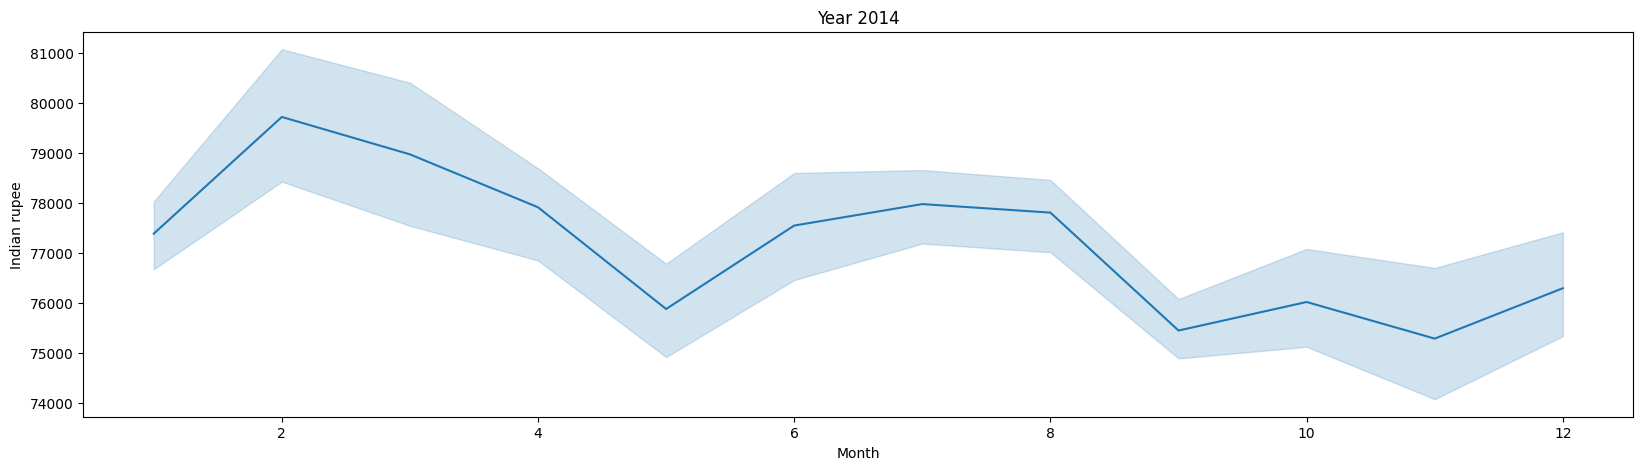

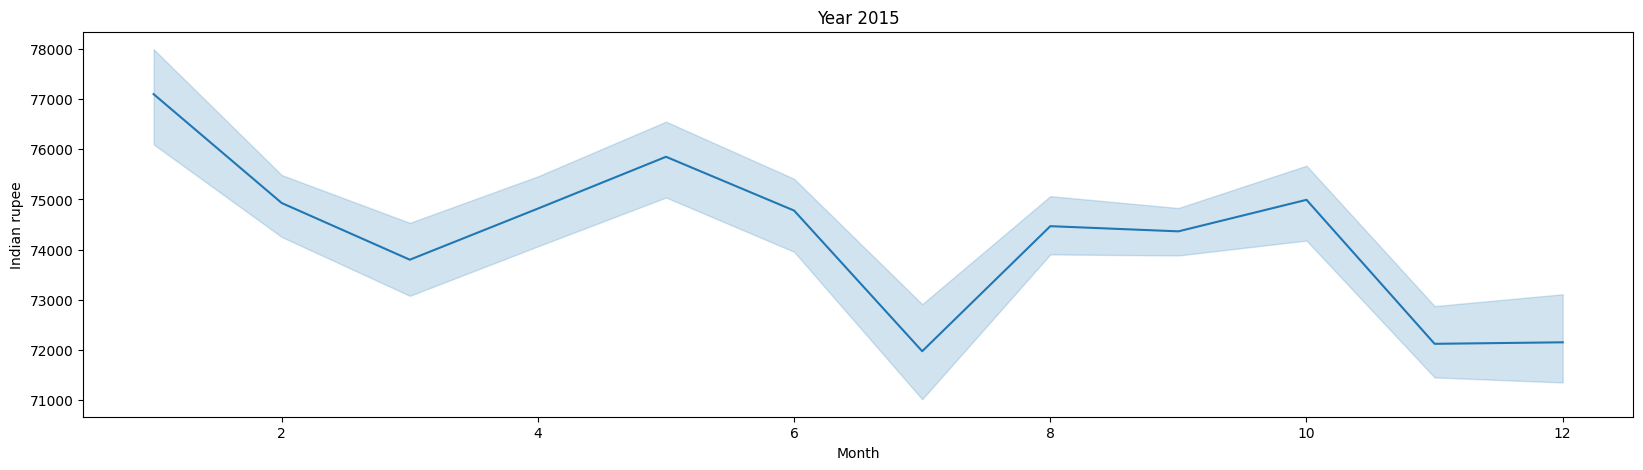

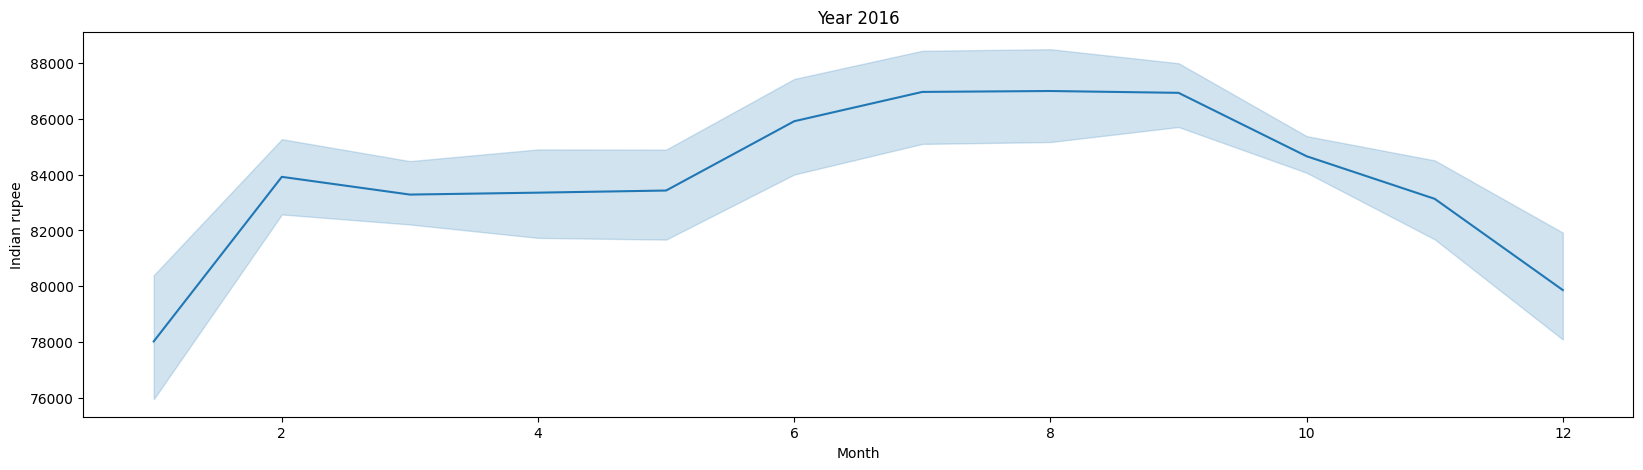

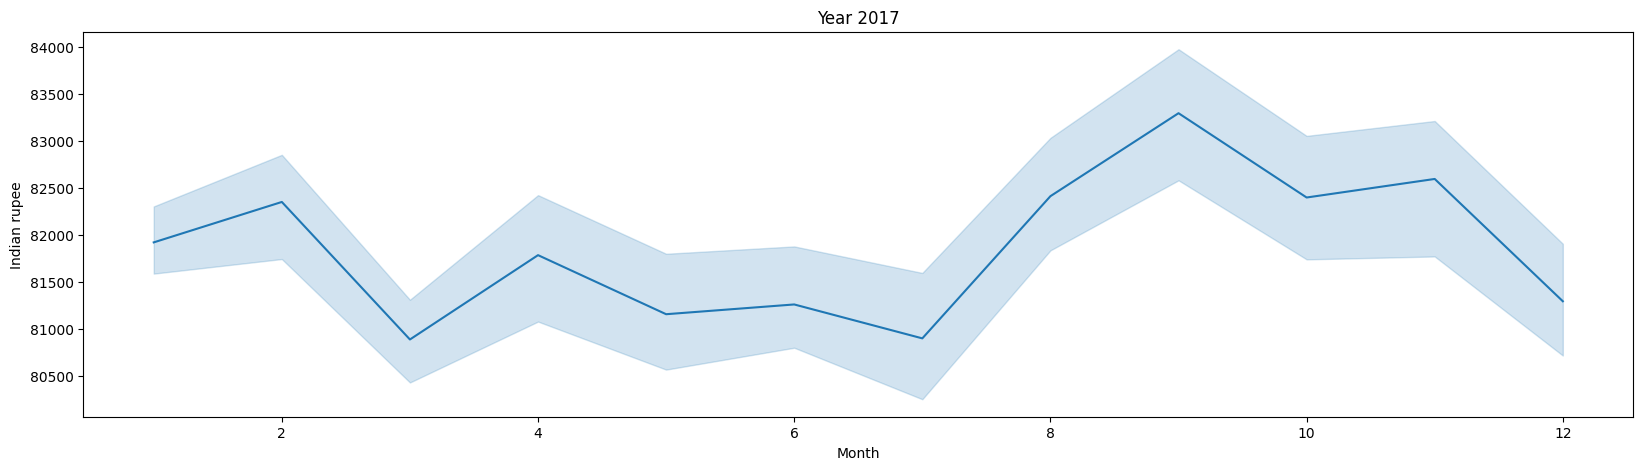

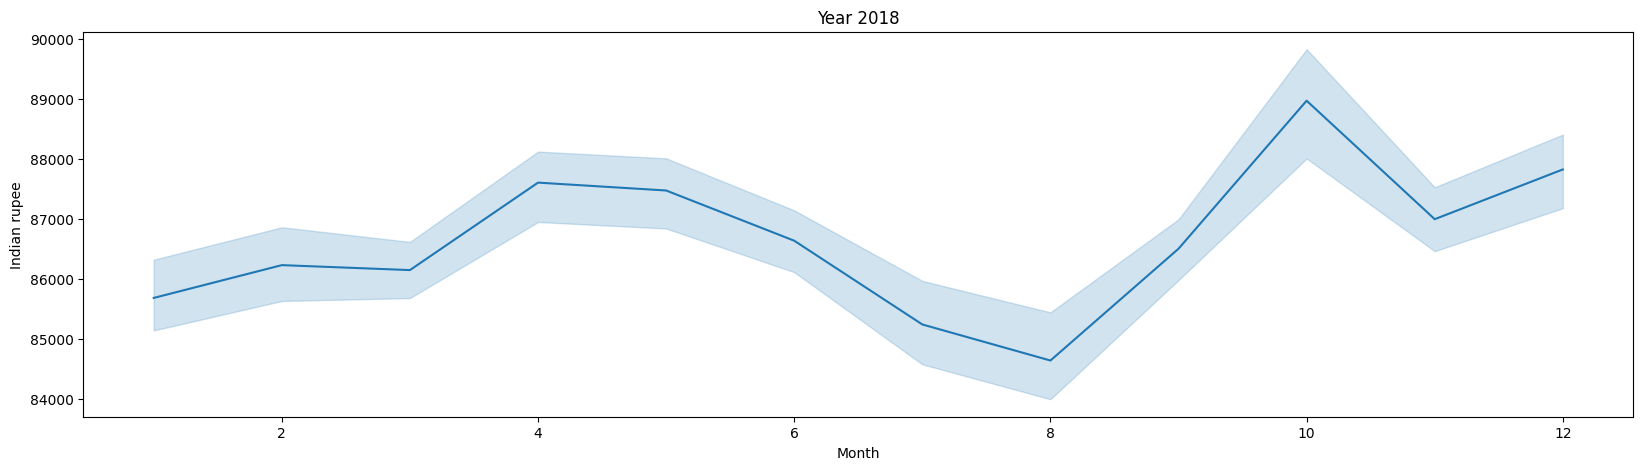

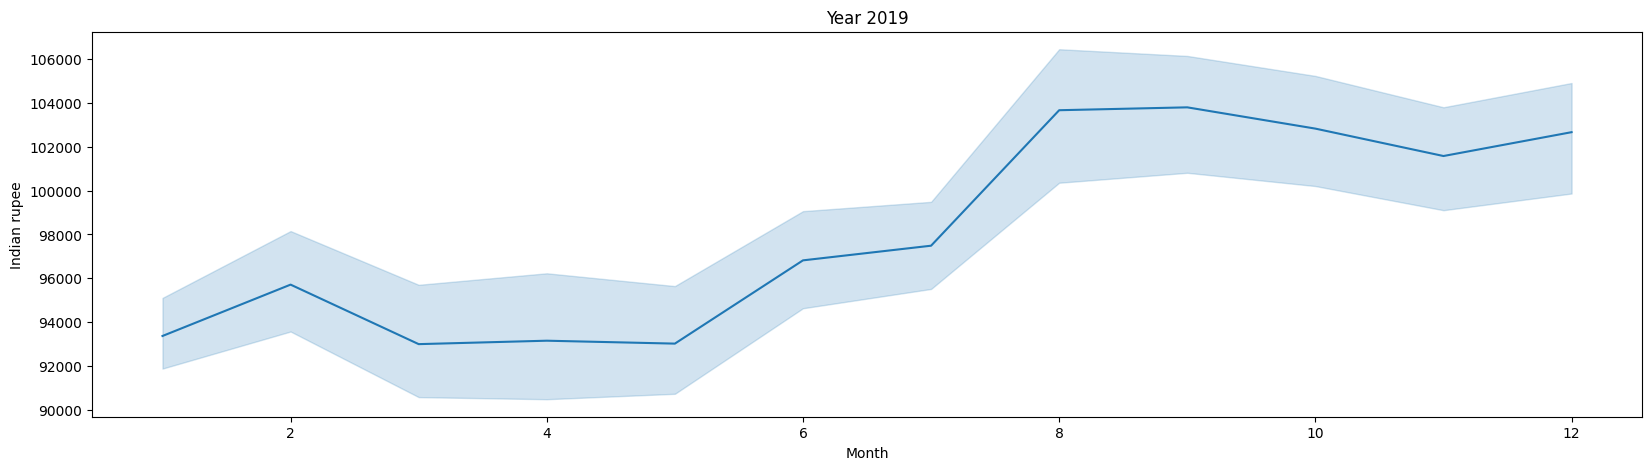

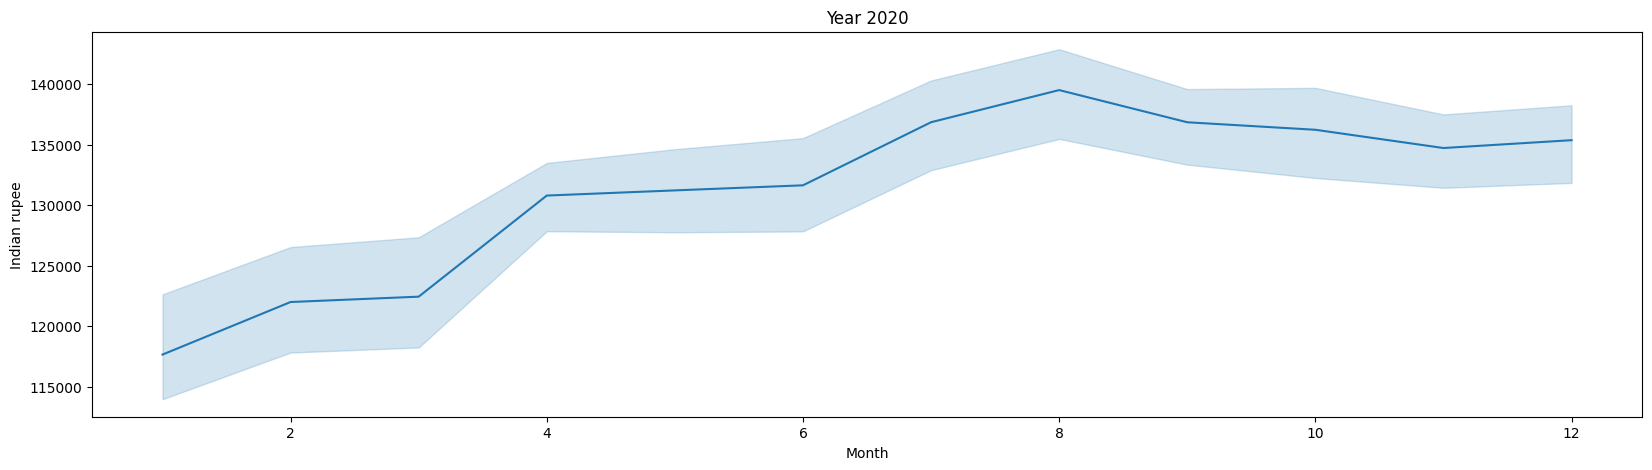

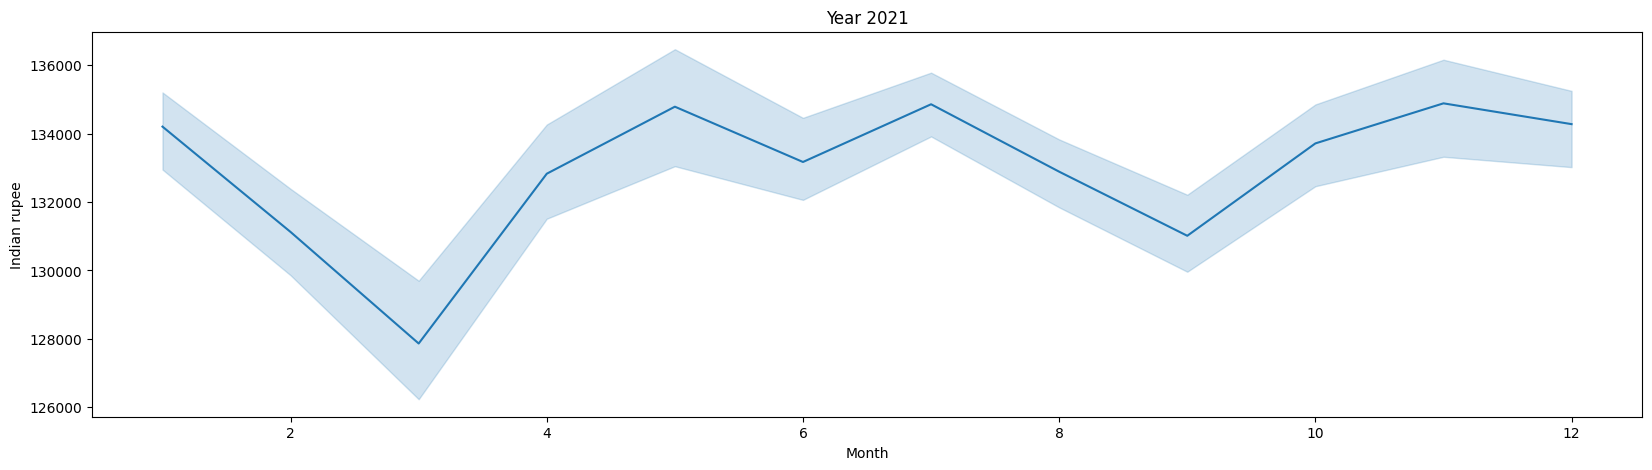

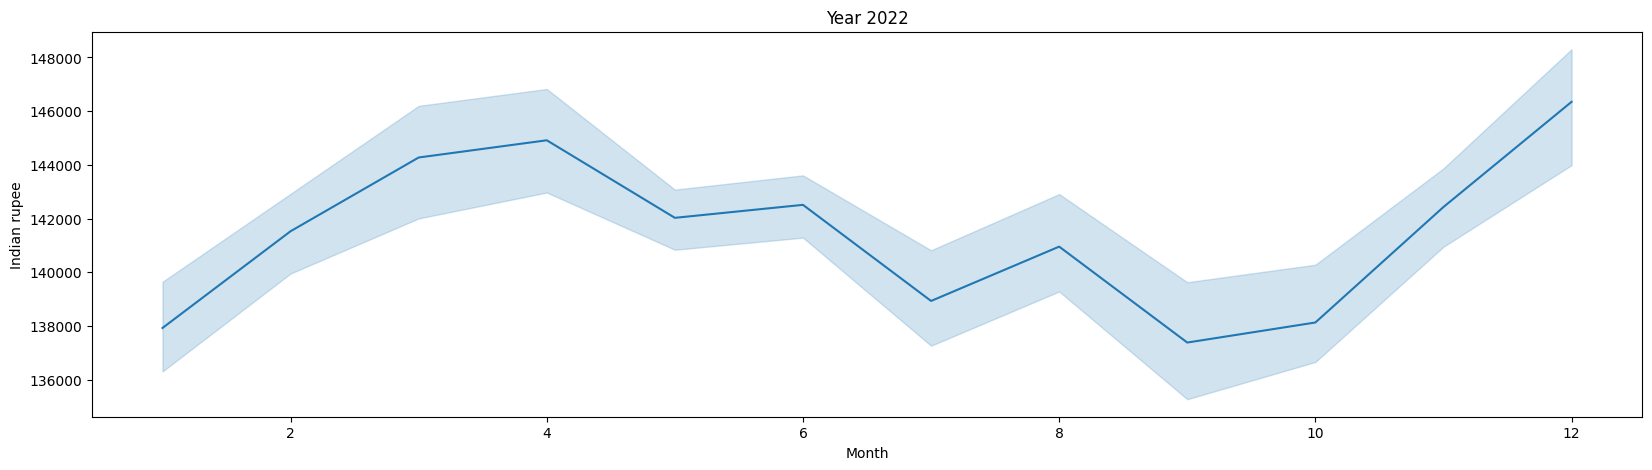

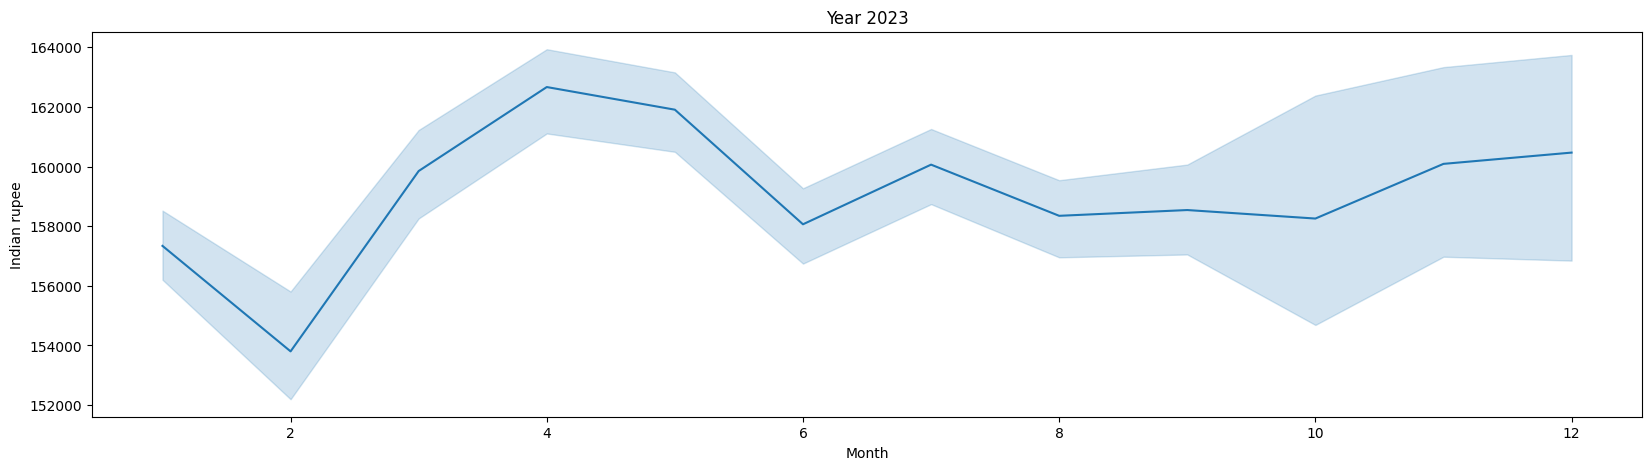

In [23]:
for i in range(len(years)):
    Yearly_data(years[i])

In [24]:
dataIndia.head()

,Date,Year,Month,Day,Indian rupee
9133,2014-01-01,2014,1,1,74461.6
9134,2014-02-01,2014,2,1,76335.9
9135,2014-03-01,2014,3,1,76810.6
9136,2014-06-01,2014,6,1,77697.5
9137,2014-07-01,2014,7,1,76305.1


## Let's Try Prophet

In [25]:
from sklearn.model_selection import train_test_split
x = dataIndia[['Year','Month','Day']]
y = dataIndia[['Indian rupee']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 99)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8609200615865074

In [27]:
model.score(x_train,y_train)

0.8628201631947099

## Importing models

In [28]:
%pip install -q xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install -q lightgbm

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from xgboost import XGBRegressor
xgb = XGBRegressor()
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Helper function for model evaluation

In [32]:
def evaluation_metrics(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    trainscore = model.score(x_train,y_train)
    
    print(f'Mean Squared Error = {mse}')
    print(f'Mean Absolute Error = {mae}')
    print(f'Root Mean Squared Error = {rmse}')
    print(f'r2 score = {r2score}')
    
    Comparison = x_test.copy("deep")
    Comparison['Actual Price'] = y_test
    Comparison['Predicted Price'] = y_pred
    
    sns.lineplot(Comparison, x = 'Year',y = 'Actual Price')
    sns.lineplot(Comparison, x = 'Year',y = 'Predicted Price')
    plt.legend(['Actual Price','','Predicted Price'])
    plt.show()
    
    return {'Training Score': trainscore,
           'Testing Score': r2score}

In [33]:
results = {}

## Linear Regression

Mean Squared Error = 117965179.46492793
Mean Absolute Error = 8940.973126495881
Root Mean Squared Error = 10861.177627906098
r2 score = 0.8609200615865074


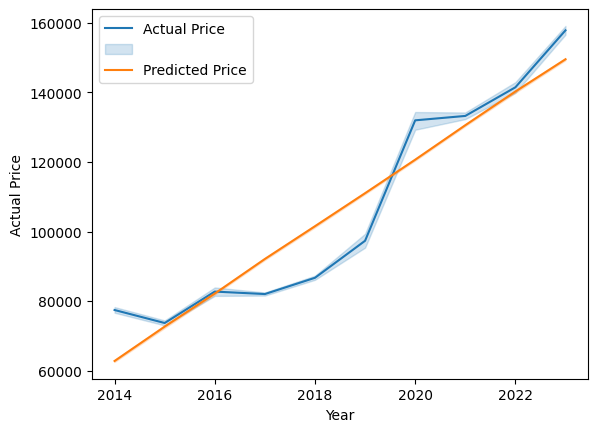

In [34]:
results['Linear Regression'] = evaluation_metrics(model)

## Decision Tree Regressor

Mean Squared Error = 3262367.5416110037
Mean Absolute Error = 1040.9308447937128
Root Mean Squared Error = 1806.2025195450824
r2 score = 0.9961536965498846


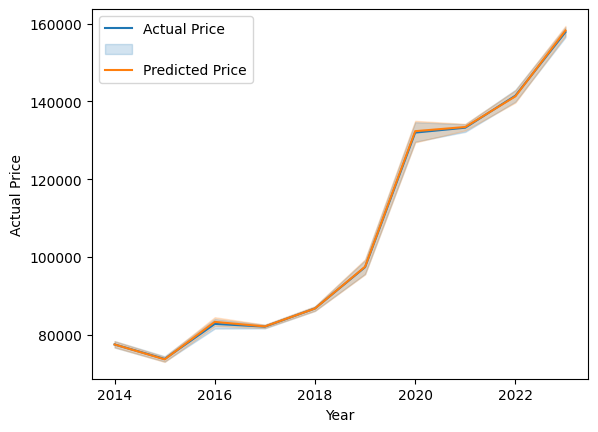

In [35]:
results['Decision Tree Regressor'] = evaluation_metrics(dtr)

## Random Forest Regressor

Mean Squared Error = 2524385.953853121
Mean Absolute Error = 995.0939842829152
Root Mean Squared Error = 1588.831631688242
r2 score = 0.9970237705347775


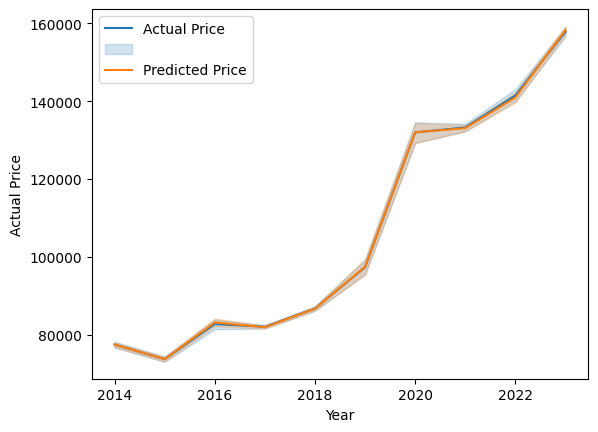

In [36]:
results['Random Forest Regressor'] = evaluation_metrics(rfr)

## XGB Regressor

Mean Squared Error = 2090214.3243206232
Mean Absolute Error = 1059.1889826866404
Root Mean Squared Error = 1445.7573531961107
r2 score = 0.9975356551753991


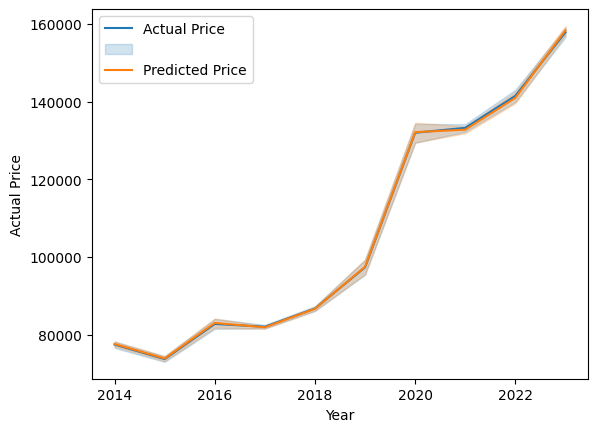

In [37]:
results['XGB Regressor'] = evaluation_metrics(xgb)

## LGBM Regressor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 2035, number of used features: 3
[LightGBM] [Info] Start training from score 105397.674831
Mean Squared Error = 5655268.219179413
Mean Absolute Error = 1715.1114942831896
Root Mean Squared Error = 2378.0807848303666
r2 score = 0.9933324871016782


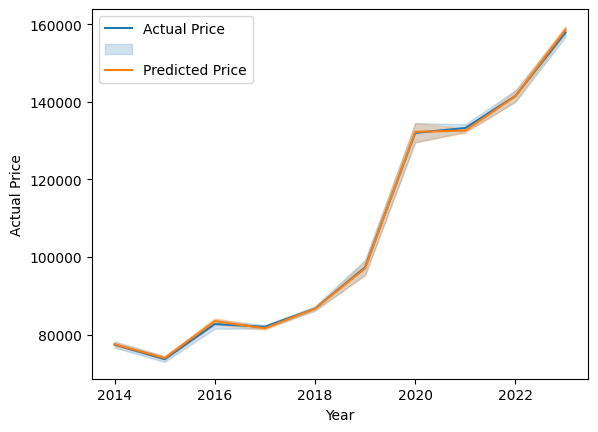

In [38]:
results['LGBM Regressor'] = evaluation_metrics(lgbm)

## Model comparison

In [39]:
resultsdf = pd.DataFrame(results)
resultsdf

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGB Regressor,LGBM Regressor
Training Score,0.86282,1.000000,0.999615,0.999482,0.996095
Testing Score,0.86092,0.996154,0.997024,0.997536,0.993332


> * Random Forest Regressor is best in all of the models 

In [40]:
%pip install -q prophet

Note: you may need to restart the kernel to use updated packages.


## Making time dataframe for Prophet

In [41]:
time_data = dataIndia[['Date','Indian rupee']]
time_data.columns = ['ds','y']
time_data.head()

,ds,y
9133,2014-01-01,74461.6
9134,2014-02-01,76335.9
9135,2014-03-01,76810.6
9136,2014-06-01,77697.5
9137,2014-07-01,76305.1


In [42]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
model_fit = m.fit(time_data)

Importing plotly failed. Interactive plots will not work.


12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
forecast = model_fit.predict(time_data)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2539,2023-12-04,159998.943768,166597.349046,154060.939479
2540,2023-12-05,159958.874169,166157.158593,153372.173171
2541,2023-12-06,159735.972391,165457.021252,153604.164199
2542,2023-12-07,160013.419577,166432.899364,154233.044769
2543,2023-12-09,159448.882127,165518.745182,153281.866153


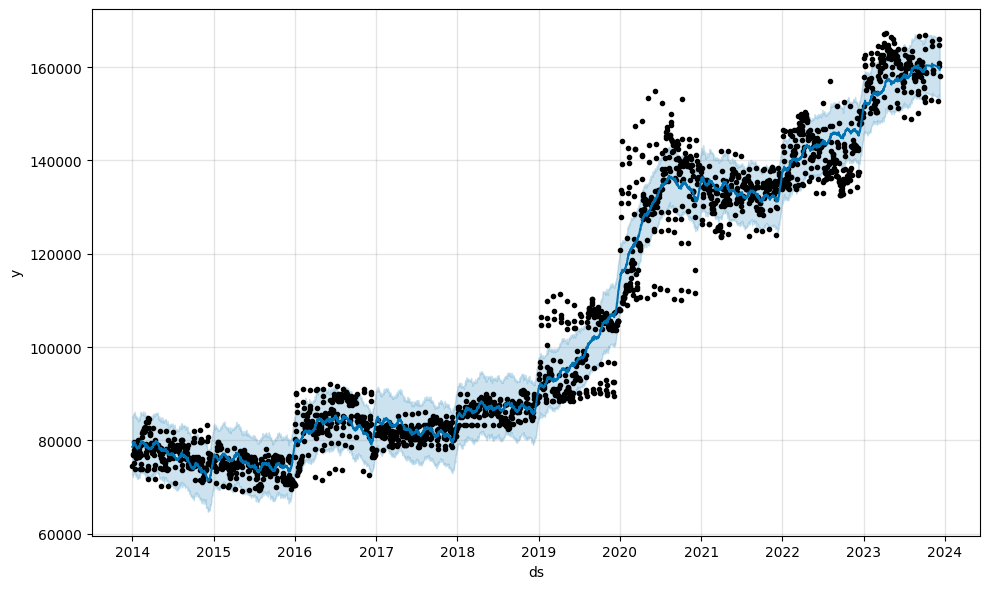

In [44]:
model_fit.plot(forecast);

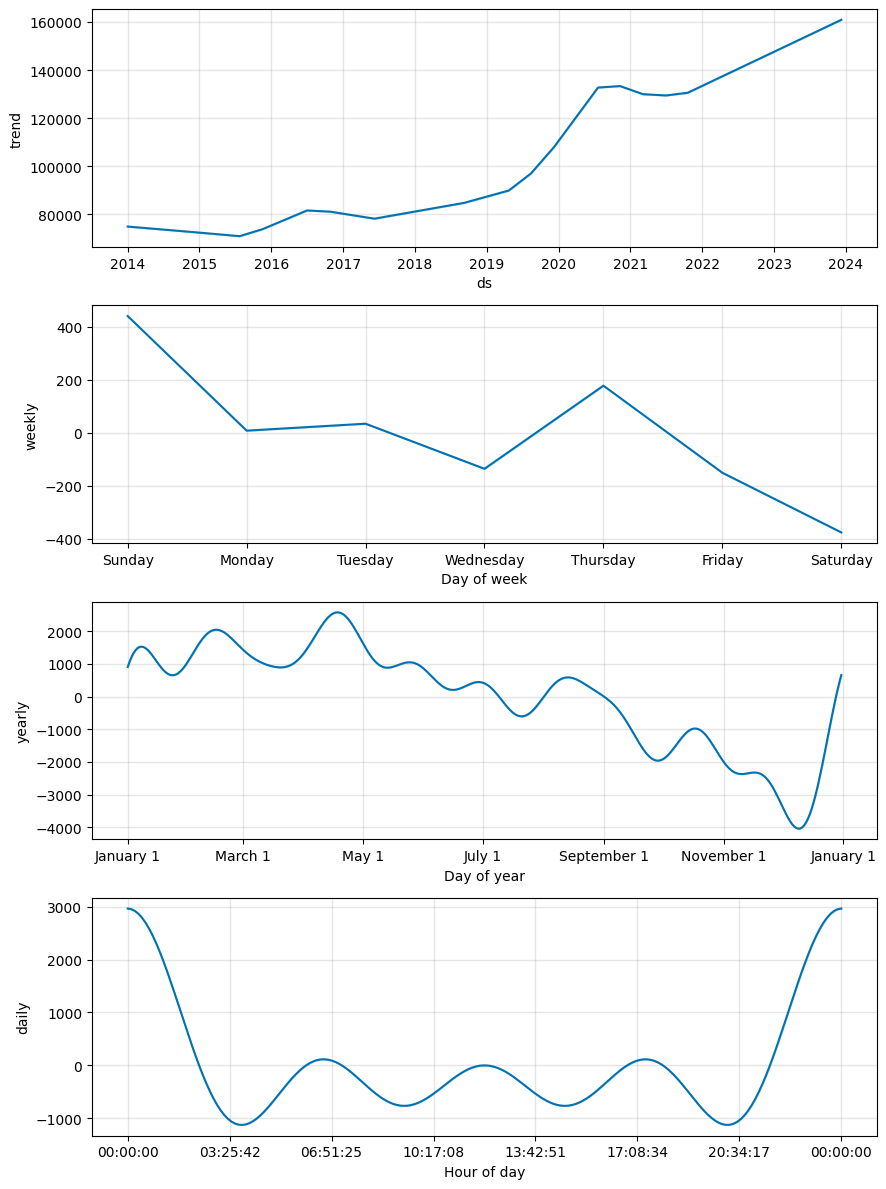

In [45]:
model_fit.plot_components(forecast);

## Forecasting for next 6 months

In [46]:
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 336)
future.tail(10)

12:46:19 - cmdstanpy - INFO - Chain [1] start processing


12:46:20 - cmdstanpy - INFO - Chain [1] done processing


,ds
2870,2024-10-31
2871,2024-11-01
2872,2024-11-02
2873,2024-11-03
2874,2024-11-04
2875,2024-11-05
2876,2024-11-06
2877,2024-11-07
2878,2024-11-08
2879,2024-11-09


In [47]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2875,2024-11-05,174515.725548,184771.029210,163882.960473
2876,2024-11-06,174345.974597,184750.042866,164477.808294
2877,2024-11-07,174669.996788,184553.613103,164532.646424
2878,2024-11-08,174361.387130,184388.093707,163980.282561
2879,2024-11-09,174164.907026,184620.696471,163936.941633


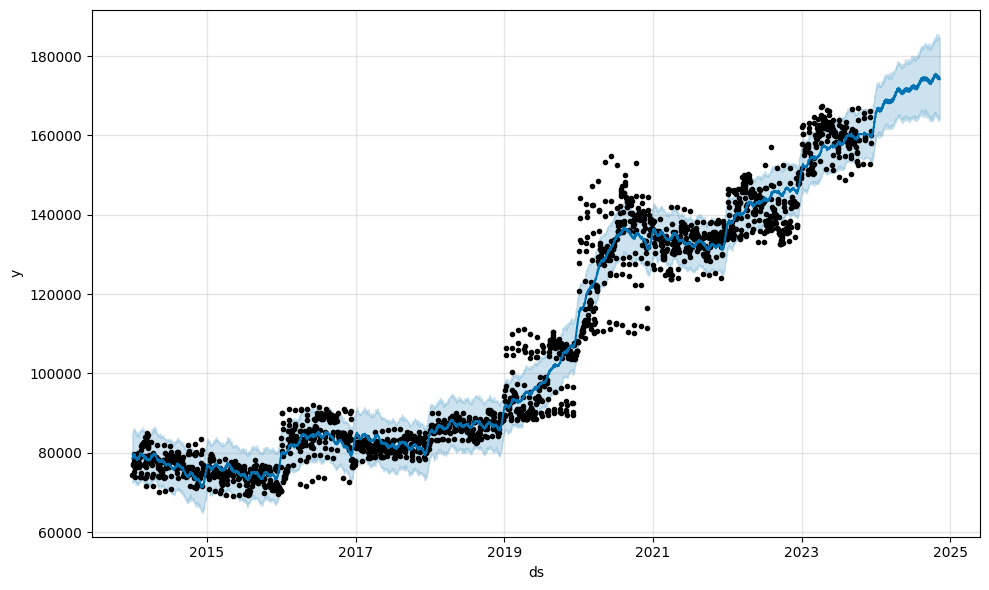

In [48]:
m2.plot(forecast2);

> * In the starting of 2024, the gold price will inflate

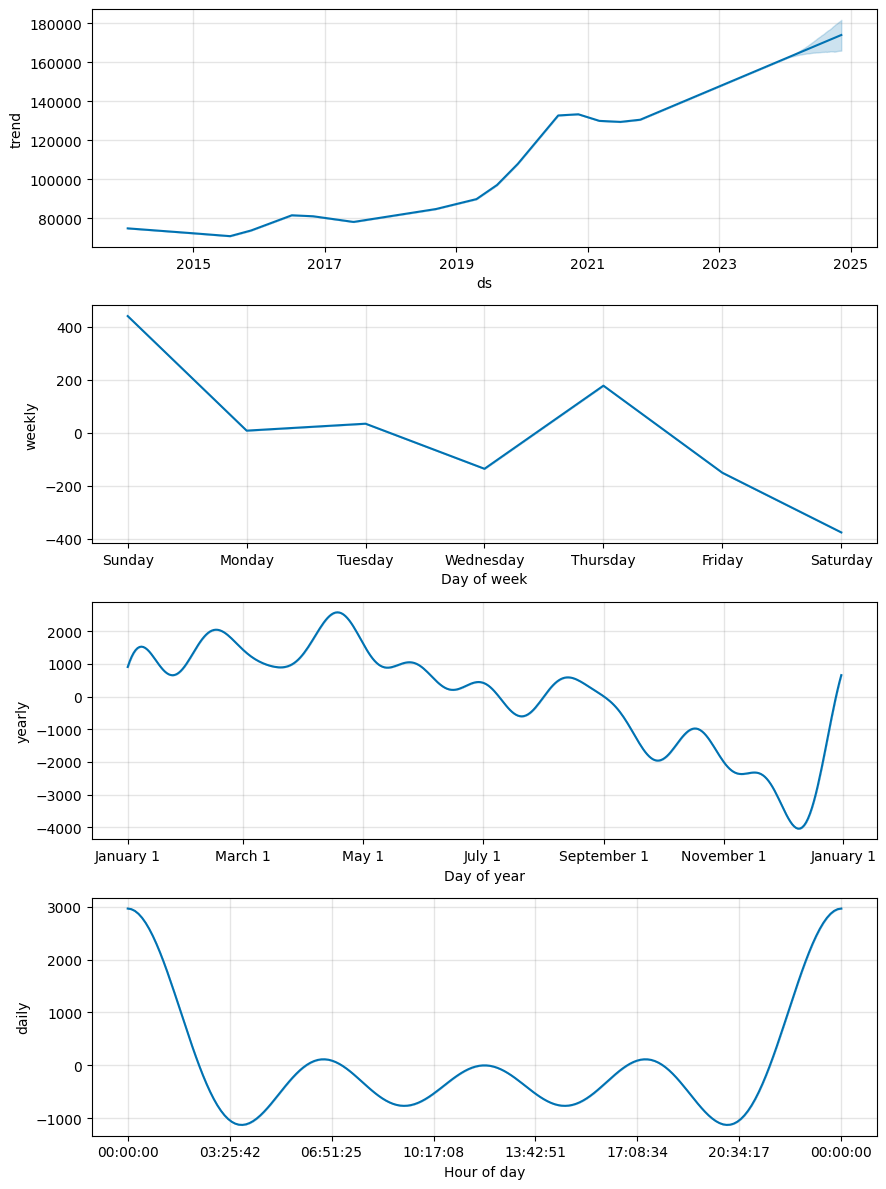

In [49]:
m2.plot_components(forecast2);

In [50]:
predictions = forecast2[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Indian rupee'})
predictions.head()

,Date,Indian rupee
0,2014-01-01,78597.835428
1,2014-01-04,78785.455282
2,2014-01-05,79689.521211
3,2014-01-07,79378.543328
4,2014-01-08,79218.346139


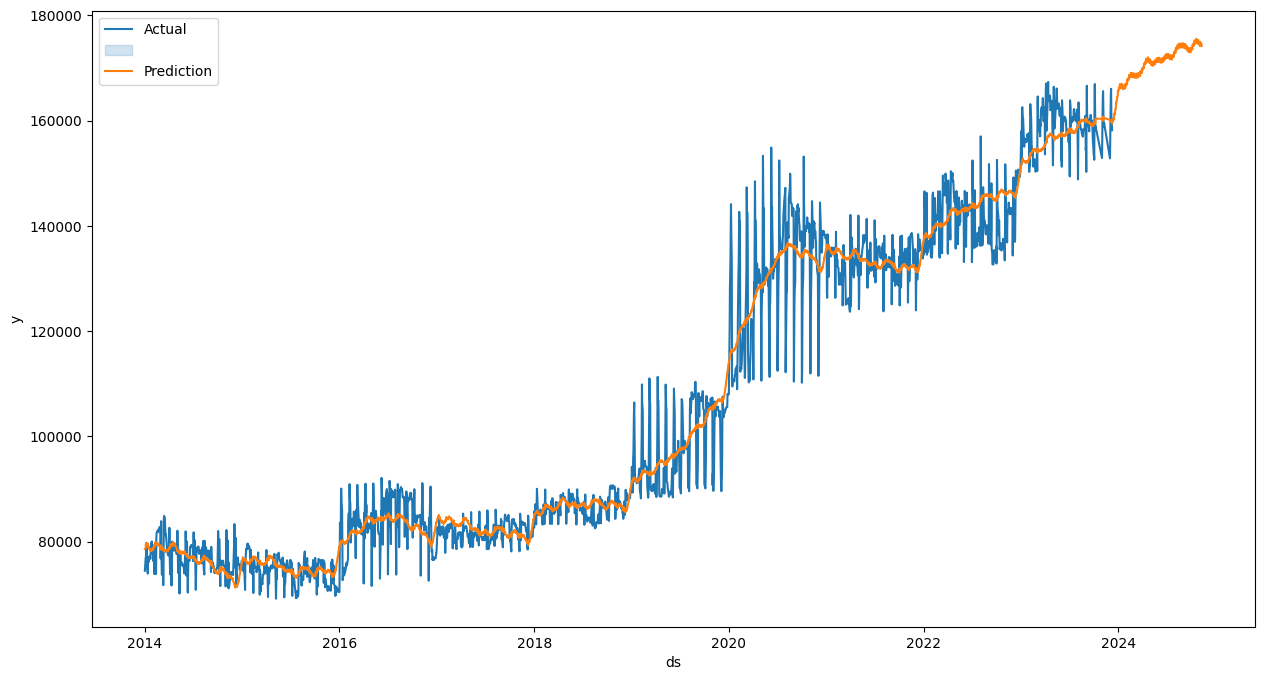

In [51]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data,x = 'ds',y='y',legend='full')
sns.lineplot(predictions,x = 'Date',y = 'Indian rupee',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.show()

In [52]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['Day'] = predictions['Date'].dt.day

## Model Evaluation

In [53]:
x_time  = predictions.drop(columns=['Date','Indian rupee'])
y_time = predictions[['Indian rupee']]

In [54]:
x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=99)

In [55]:
rfr_time_model = RandomForestRegressor()
rfr_time_model.fit(x_time_train,y_time_train)
rfr_time_pred = rfr_time_model.predict(x_time_test)

Mean Squared Error = 2459691.387295489
Mean Absolute Error = 991.5533457760394
Root Mean Squared Error = 1568.340328913176
r2 score = 0.9971000448758444


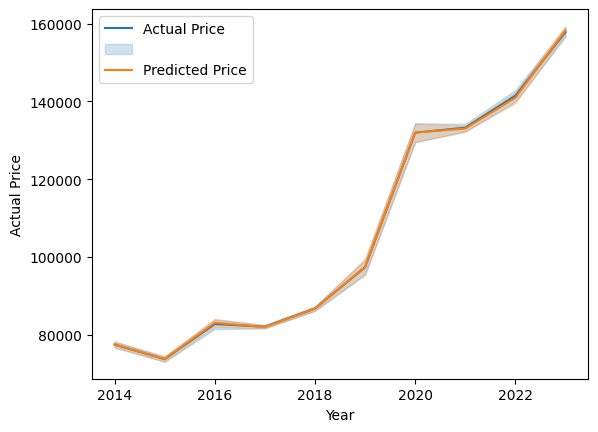

In [56]:
results['Random Forest Evaluation Regressor'] = evaluation_metrics(rfr_time_model)

In [57]:
del results['Linear Regression']
del results['Decision Tree Regressor']
del results['XGB Regressor']
del results['LGBM Regressor']

## Comparing accuracy of predicted model and forecasted model

In [58]:
CompareRFR = pd.DataFrame(results)
CompareRFR

,Random Forest Regressor,Random Forest Evaluation Regressor
Training Score,0.999615,0.999603
Testing Score,0.997024,0.997100


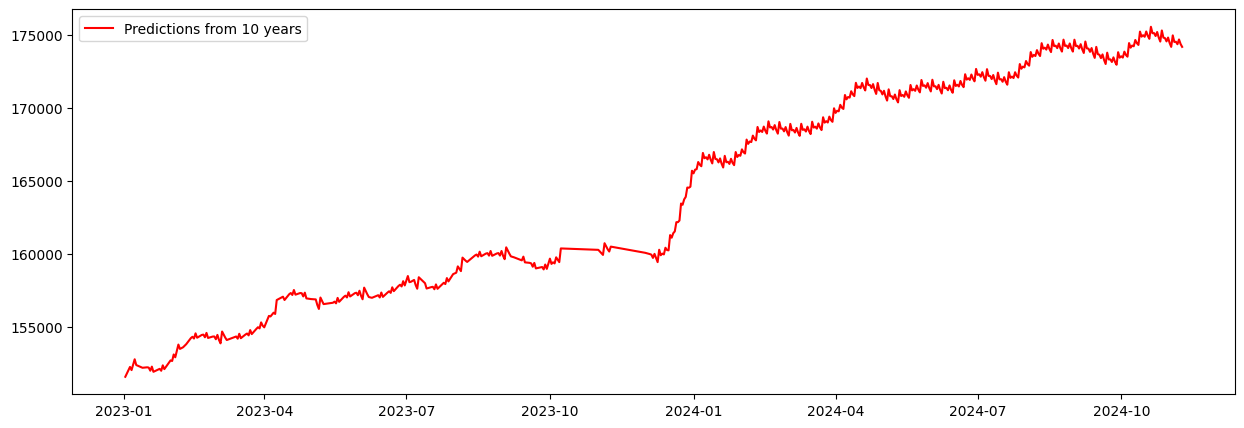

In [59]:
analysis = predictions[predictions['Year']>2022]

plt.subplots(figsize = (15,5))
plt.plot(analysis['Date'],analysis['Indian rupee'],color = 'red',label = 'Predictions from 10 years')
plt.legend()
plt.show()

In [60]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="c9c4ba8f-4fd1-4939-ada7-da53564b2988",
    resource_group_name="FutureReadtTalent",
    workspace_name="NPTELProject",
)

In [63]:
import pickle

# Assuming that 'model' is your machine learning model
with open('gold_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [64]:
#Register model in workspace
from azureml.core import Model
model = Model.register(ws,model_path="./gold_price_model.pkl",model_name="gold_price_model")

Registering model gold_price_model


In [65]:
model = Model(ws,"gold_price_model")

In [73]:
from azureml.core.model import InferenceConfig
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

myenv = Environment(name="akritiupadhyay-env")
conda_packages = ['numpy']
pip_packages = ['azureml-sdk','azureml-defaults','scikit-learn']
mycondaenv = CondaDependencies.create(conda_packages=conda_packages, pip_packages=pip_packages, python_version='3.10.11')
myenv.python.conda_dependencies = mycondaenv
myenv.register(workspace=ws)

inference_config = InferenceConfig(entry_script='score.py', source_directory='.', environment=myenv)


In [74]:
from azureml.core.webservice import AciWebservice
aciconfig = AciWebservice.deploy_configuration(cpu_cores=1,memory_gb=1)

In [75]:
# Deploying the model
service = Model.deploy(ws, "goldpriceendpoint",  # This is endpoint name
                       models=[model],
                       inference_config=inference_config,
                       deployment_config=aciconfig,
                       #deployment_target=predenv,
                       overwrite=True)
service.wait_for_deployment(show_output=True)
url = service.scoring_uri
print(url)


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2023-10-03 13:33:37+00:00 Creating Container Registry if not exists.
2023-10-03 13:33:37+00:00 Registering the environment.
2023-10-03 13:33:40+00:00 Use the existing image.
2023-10-03 13:33:40+00:00 Submitting deployment to compute.
2023-10-03 13:33:42+00:00 Checking the status of deployment goldpriceendpoint.

In [71]:
print(service.get_logs())

None
